# MINIPROJETO 2

## <font color='red'>Bruno Porto, Felipe Giorgi e Yago Ribeiro Labate</font>
___

## <font color='blue'>Tempo de espera da fila do McDonald's</font>

### Item 1

A variável escolhida será modelada por uma distribuição exponencial

** Valores: **
    - Média = 5

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import math
from astropy.table import Table, Column

(array([  1.09457861e-01,   2.79746279e-02,   7.40301123e-03,
          1.90417888e-03,   4.96678237e-04,   1.03167586e-04,
          3.97932119e-05,   0.00000000e+00,   1.47382266e-06,
          1.47382266e-06]),
 array([  1.00000588,   7.78508272,  14.57015955,  21.35523638,
         28.14031322,  34.92539005,  41.71046688,  48.49554372,
         55.28062055,  62.06569738,  68.85077422]),
 <a list of 10 Patch objects>)

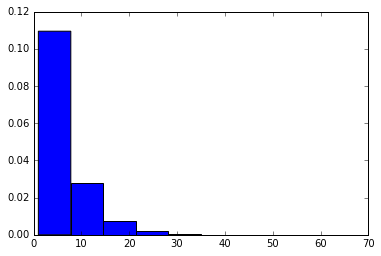

In [41]:
# Gerando valores aleatórios

ValoresAleatorios = stats.expon.rvs(1,5,size=100000)
plt.hist(ValoresAleatorios, normed = True)

In [49]:
# Média e variancia

media = ValoresAleatorios.mean()
var = ValoresAleatorios.var()

print('A média é', media,'e a variancia é',var)


A média é 6.00737086271 e a variancia é 24.9656612807


### Item  2

Agora serão feitas simulações de valores amostrais para comprovar que a média de uma amostra aleatória pertence a uma distribuição normal. Quanto maior forem as amostras aleatórias, mais elas se aproximaram a uma normal.

#### Funções

In [27]:
def calcula_Media_Amostral(n,dados):
    soma=0
    for i in range(n):
        soma+=np.random.choice(dados)
    media=soma/n
    return media

def calcula_Media(lista):
    soma=0
    for i in lista:
        soma+=i
    media=soma/len(lista)
    return media

def calcula_Var(lista):
    media=calcula_Media(lista)
    soma=0
    for i in lista:
        soma+=(i-media)**2
    var=soma/len(lista)
    return var

#### Simulação para n=2

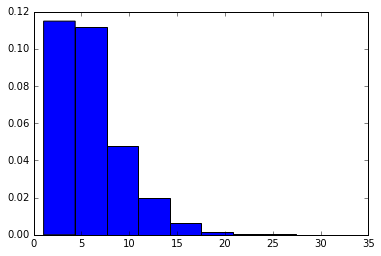

A Media é:  6.01188062936 
A variancia é: 12.2570673965


In [28]:
n=2
MAmostrais=[]
for i in range(10000):
    MAmostrais.append(calcula_Media_Amostral(n,ValoresAleatorios))

plt.hist(MAmostrais,normed=True)
plt.show()
print('A Media é: ',calcula_Media(MAmostrais),'\nA variancia é:',calcula_Var(MAmostrais))

### Item 3

#### Simulação para n=4

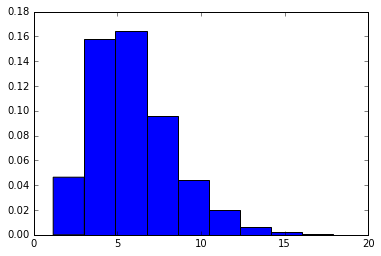

A Media é:  5.94962499831 
A Variancia é: 6.09443374716


In [29]:
n=4
MAmostrais=[]
for i in range(10000):
    MAmostrais.append(calcula_Media_Amostral(n,ValoresAleatorios))

plt.hist(MAmostrais,normed=True)
plt.show()
print('A Media é: ',calcula_Media(MAmostrais),'\nA Variancia é:',calcula_Var(MAmostrais))

#### Simulação para n=20

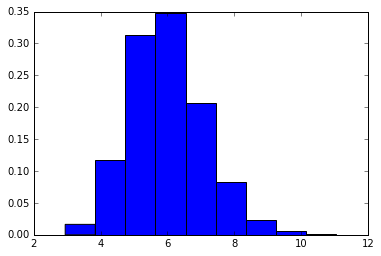

A Media é:  5.98648678651 
A Variancia é: 1.2228564183


In [30]:
n=20
MAmostrais=[]
for i in range(10000):
    MAmostrais.append(calcula_Media_Amostral(n,ValoresAleatorios))

plt.hist(MAmostrais,normed=True)
plt.show()
print('A Media é: ',calcula_Media(MAmostrais),'\nA Variancia é:',calcula_Var(MAmostrais))

#### Simulação para n=50

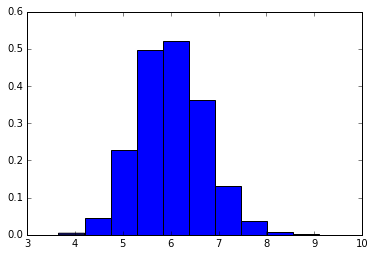

A Media é:  6.01015855514 
A Variancia é: 0.496137493479


In [59]:
n=50
MAmostrais=[]
for i in range(10000):
    MAmostrais.append(calcula_Media_Amostral(n,ValoresAleatorios))

plt.hist(MAmostrais,normed=True)
plt.show()
print('A Media é: ',calcula_Media(MAmostrais),'\nA Variancia é:',calcula_Var(MAmostrais))


Segundo o teorema do limite central, além da média da população ser igual à esperança das médias das amostras, a variancia das médias das amostras é igual a variancia da população sobre o número de termos das amostras:


In [60]:
n = 50

varAmostras = var/n

print('A variancia calculada no item acima é',calcula_Var(MAmostrais),'e a variacia calculada pela afirmação acima é',varAmostras)

A variancia calculada no item acima é 0.496137493479 e a variacia calculada pela afirmação acima é 0.499313225614


** Como esperado, o resultado da media das medias amostrais se aproxima cada vez mais de uma distribuição normal com media igual a esperança da população total e variancia igual a variancia da população total sobre o número de termos '(var/n)', conforme n aumenta. **

### Item 4

Como pode ser observado nos itens acima, além da média de uma amostra aleatória pertencer a uma distribuição normal, a esperança dessa distribuição é igual à esperança da própria variável aleatória. 

As amostras são chamadas de amostras aleatórias pois seus termos são independentes e identicamente distribuídas a X. Para compravar isso, será feito, em seguida, uma comparação entre todos os primeiros e nonos elementos de cada amostra.

Primeiro, serão guardados todos os primeiros e nonos valores de cada amostra:


In [37]:
Primeiros = []
Nonos = []

n = 50
for i in range(10000):
    lista = []

    for j in range(n):
        lista.append(np.random.choice(ValoresAleatorios))
        
    Primeiros.append(lista[0])
    Nonos.append(lista[8])      


Uma vez guardados, será feita um histograma para cada:

#### Histograma dos primeiros valores:

(array([  1.31071283e-01,   5.19454013e-02,   2.04343242e-02,
          8.37829054e-03,   3.35131621e-03,   1.52332555e-03,
          4.13474078e-04,   2.82903317e-04,   1.30570762e-04,
          8.70471744e-05]),
 array([  1.00002182,   5.59523129,  10.19044076,  14.78565023,
         19.3808597 ,  23.97606916,  28.57127863,  33.1664881 ,
         37.76169757,  42.35690704,  46.95211651]),
 <a list of 10 Patch objects>)

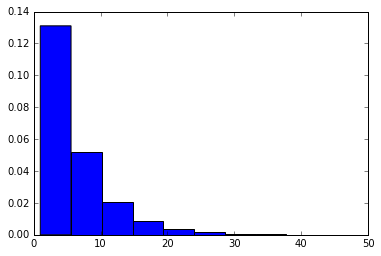

In [42]:
plt.hist(Primeiros, normed = 1)

#### Histograma dos nonos valores:

(array([  1.35393436e-01,   5.94474543e-02,   2.51794381e-02,
          1.09110898e-02,   5.10782887e-03,   2.25415922e-03,
          7.91353768e-04,   4.79608344e-04,   1.67862920e-04,
          7.19412516e-05]),
 array([  1.00079686,   5.17086609,   9.34093532,  13.51100455,
         17.68107379,  21.85114302,  26.02121225,  30.19128148,
         34.36135072,  38.53141995,  42.70148918]),
 <a list of 10 Patch objects>)

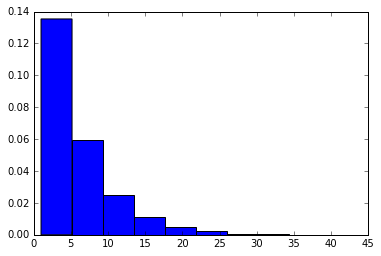

In [43]:
plt.hist(Nonos, normed = 1)

Como pode ser observado, as distribuições da variável escolhida são iguais às distribuições dos primeiros e nonos valores, ou seja, eles são identicamente distribuídas a X.

Para demonstrar que os valores das amostras são independentes, será calculada a correlação entre os seus valores:


In [47]:

mediaprimeiros = calcula_Media(Primeiros)
medianonos = calcula_Media(Nonos)

soma = 0
for i in range(len(Primeiros)):
    soma += (Primeiros[i] - mediaprimeiros)*(Nonos[i] - medianonos)
    
Covariancia = soma/len(Primeiros)

Correlacao = Covariancia/((calcula_Var(Primeiros)**(1/2))*calcula_Var(Primeiros)**(1/2))
print('A correlação entre os primeiros e nonos elementos é:',Correlacao)
    

A correlação entre os primeiros e nonos elementos é: 0.00143290737253


Como a correlação entre esses valores está muito próxima de zero, conclui-se que os termos das amostras são independentes.